<a href="https://colab.research.google.com/github/Rekha-choudary/emotional-classification/blob/main/emotional_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
msambare_fer2013_path = kagglehub.dataset_download('msambare/fer2013')

print('Data source import complete.')

Data source import complete.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,GlobalAveragePooling2D,Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import os

In [ ]:
train_path = '/kaggle/input/fer2013/train'
test_path = '/kaggle/input/fer2013/test'

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    validation_split = 0.2
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(48,48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle = True,
    subset = 'training'
)
test_gen = test_datagen.flow_from_directory(
    test_path,
    target_size=(48,48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 22968 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
print(train_gen.class_indices)


{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


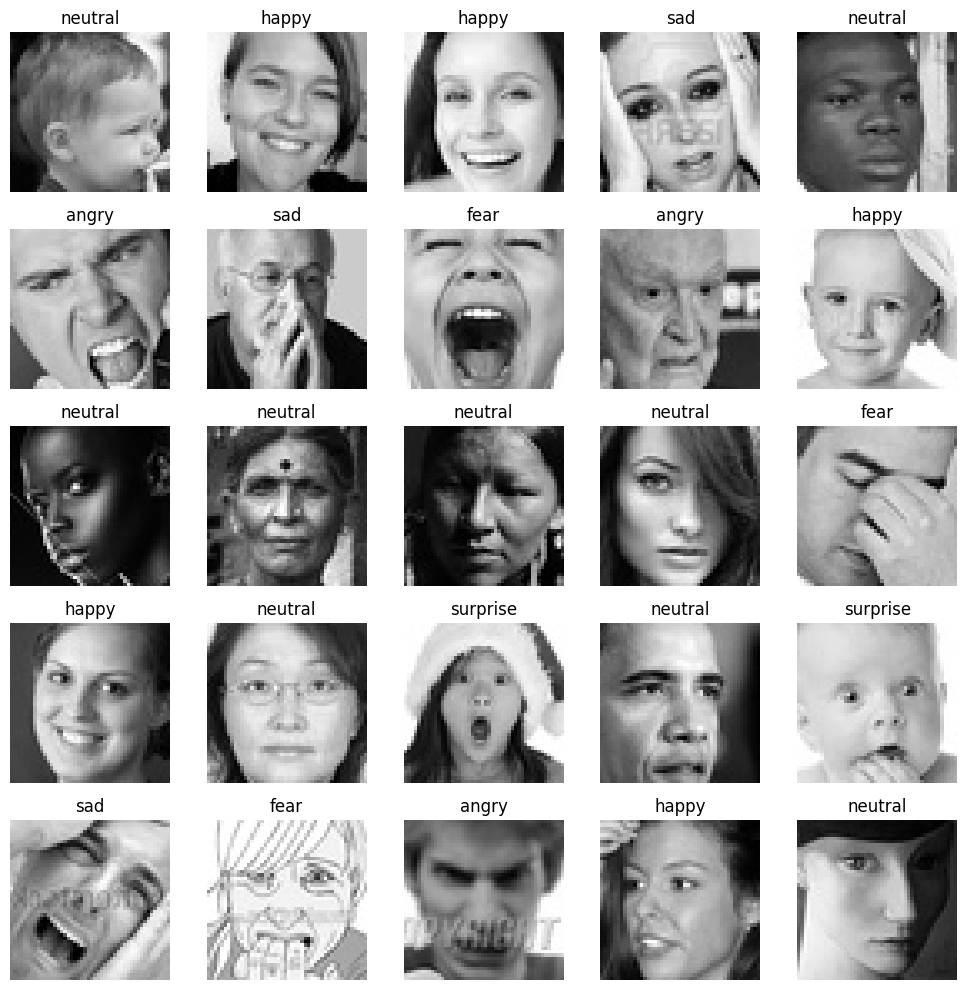

In [ ]:
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(10, 10))
axes = axes.flatten()

BATCH_SIZE = 32
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

for i in range(25):
    j = np.random.randint(train_gen.n)
    batch_images, batch_labels = train_gen[j // BATCH_SIZE]
    id_in_batch = j % BATCH_SIZE

    image = batch_images[id_in_batch]
    label = batch_labels[id_in_batch].argmax()

    if image.shape[-1] == 1:  # grayscale
        axes[i].imshow(image.squeeze(), cmap="gray")
    else:
        axes[i].imshow(image)

    axes[i].set_title(emotions[label])
    axes[i].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

INPUT_SHAPE = (48, 48, 1)

model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,047 (1.22 MB)

 Trainable params: 318,727 (1.22 MB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
es = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                   min_delta = 0,
                                   patience = 3,
                                   verbose = 1,
                                   restore_best_weights = True)

from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)


In [ ]:
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=100,
    callbacks=[reduce_lr,es]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 104s 134ms/step - accuracy: 0.3011 - loss: 2.0063 - val_accuracy: 0.4048 - val_loss: 1.5625 - learning_rate: 0.0010
Epoch 2/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.4456 - loss: 1.4407 - val_accuracy: 0.4046 - val_loss: 1.6250 - learning_rate: 0.0010
Epoch 3/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.4898 - loss: 1.3244 - val_accuracy: 0.4568 - val_loss: 1.3953 - learning_rate: 0.0010
Epoch 4/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.5158 - loss: 1.2623 - val_accuracy: 0.4827 - val_loss: 1.3417 - learning_rate: 0.0010
Epoch 5/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.5393 - loss: 1.2099 - val_accuracy: 0.5078 - val_loss: 1.2841 - learning_rate: 0.0010
Epoch 6/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.5544 - loss: 1.1705 - val_accuracy: 0.5036 - val_loss: 1.3119 - learning_rate: 0.0010
Epoch 7/100
718/718 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score

In [ ]:
y_true = test_gen.classes
y_pred_prob = model.predict(test_gen)
y_pred = np.argmax(y_pred_prob,axis=1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step


In [ ]:
acc=accuracy_score(y_true,y_pred)
f1 = f1_score(y_true,y_pred,average='weighted')


In [ ]:
true_label = test_gen.classes
print(true_label)

[0 0 0 ... 6 6 6]


In [ ]:
print(acc,f1)

0.5874895514070771 0.5783388953292016


In [ ]:
target_names = list(test_gen.class_indices.keys())
print(classification_report(y_true,y_pred,target_names=target_names))

              precision    recall  f1-score   support

       angry       0.49      0.49      0.49       958
     disgust       0.53      0.26      0.35       111
        fear       0.46      0.28      0.35      1024
       happy       0.76      0.83      0.80      1774
     neutral       0.52      0.62      0.56      1233
         sad       0.44      0.46      0.45      1247
    surprise       0.74      0.74      0.74       831

    accuracy                           0.59      7178
   macro avg       0.56      0.53      0.53      7178
weighted avg       0.58      0.59      0.58      7178



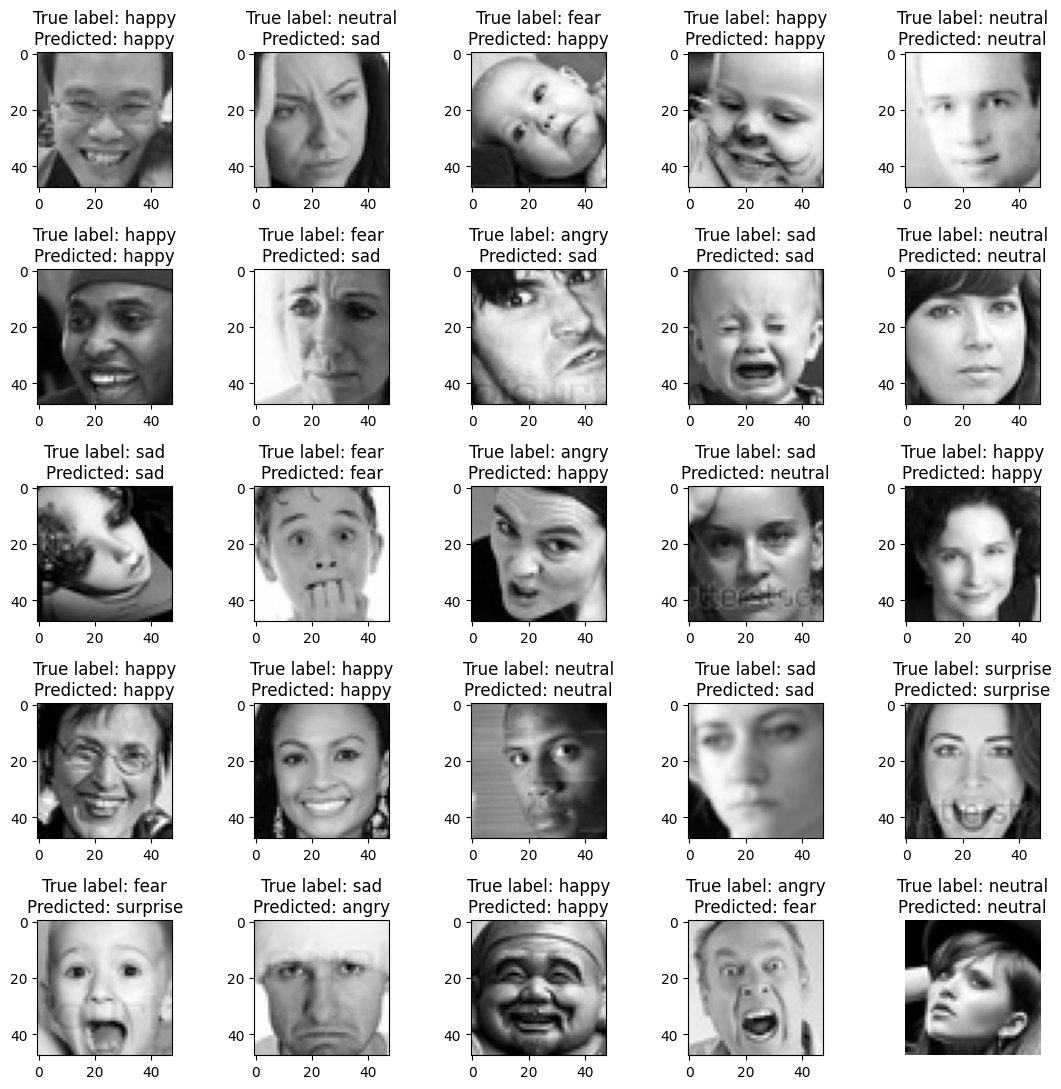

In [ ]:
fig, axes = plt.subplots(ncols = 5, nrows = 5, figsize = (11, 11))
axes =axes.flatten()

for i in range(25):
    j = np.random.randint(test_gen.n)

    # take data
    batch_images, batch_labels = test_gen[j // BATCH_SIZE]
    id_in_batch = j % BATCH_SIZE
    image = batch_images[id_in_batch]
    label = batch_labels[id_in_batch].argmax()

    # show data
    axes[i].imshow(image, cmap = "gray")
    axes[i].set_title(f"True label: {emotions[label]}\nPredicted: {emotions[y_pred[j]]}")

axes[i].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns

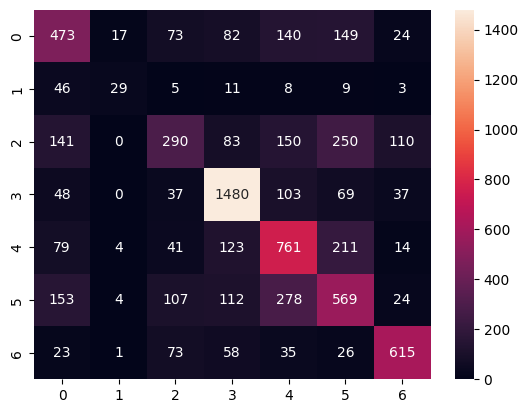

In [ ]:
cfs_mt = confusion_matrix(true_label, y_pred)

plt.figure()

sns.heatmap(cfs_mt, annot = True, fmt = 'd')

plt.show()

In [ ]:
model.save('emotion_model.h5')

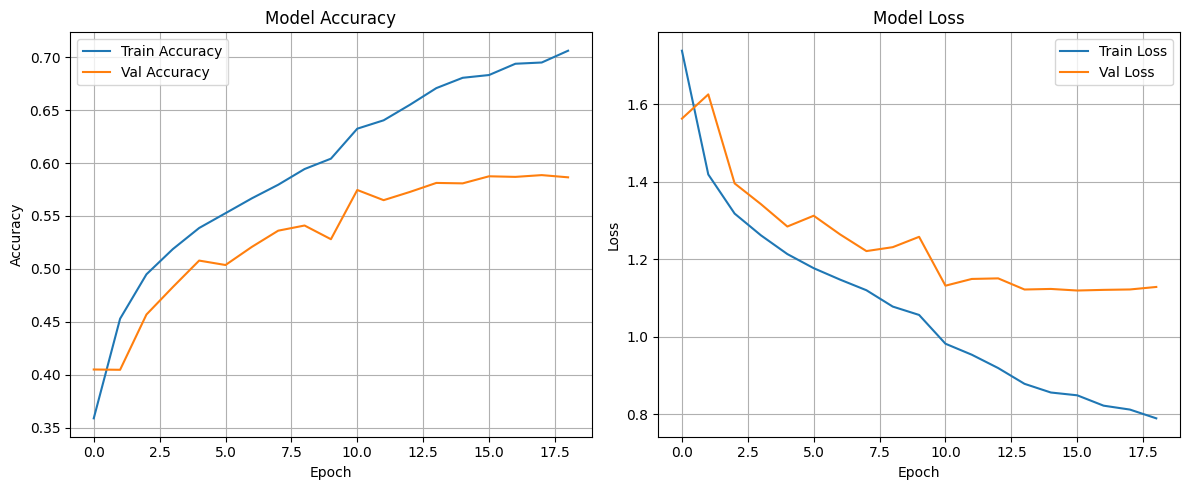

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()